In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 753.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 103.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 142.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 142.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from PIL import Image, ImageOps
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
images = []
ages = []
genders = []

folder_path = '/content/drive/MyDrive/crop_part1/'

for i in os.listdir(folder_path):
    split = i.split('_')
    ages.append(int(split[0]))
    genders.append(int(split[1]))
    images.append(Image.open(folder_path + i))

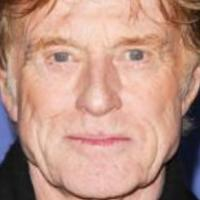

In [ ]:
from PIL import Image
from IPython.display import display

display(images[0])

In [ ]:
ages[0]

78

In [ ]:
genders[0]

0

In [ ]:
images = pd.Series(list(images), name = 'Images')
ages = pd.Series(list(ages), name = 'Ages')
genders = pd.Series(list(genders), name = 'Genders')

df = pd.concat([images, ages, genders], axis=1)
df

,Images,Ages,Genders
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,78,0
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,76,1
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,76,1
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,78,0
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,77,0
...,...,...,...
9775,<PIL.JpegImagePlugin.JpegImageFile image mode=...,16,0
9776,<PIL.JpegImagePlugin.JpegImageFile image mode=...,16,0
9777,<PIL.JpegImagePlugin.JpegImageFile image mode=...,16,0
9778,<PIL.JpegImagePlugin.JpegImageFile image mode=...,16,0


/tmp/ipython-input-409036286.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ages'],kde=True, bins=30)


<Axes: xlabel='Ages', ylabel='Density'>

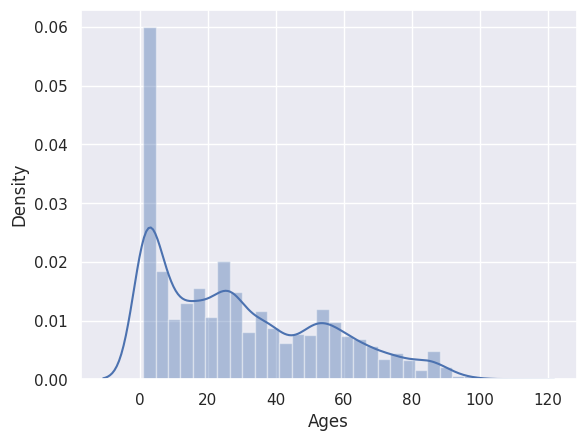

In [ ]:
sns.set_theme()
sns.distplot(df['Ages'],kde=True, bins=30)

In [ ]:
under4s = []

for i in range(len(df)):
    if df['Ages'].iloc[i] <= 4:
        under4s.append(df.iloc[i])
under4s = pd.DataFrame(under4s)
under4s = under4s.sample(frac=0.3)

df = df[df['Ages'] > 4]

df = pd.concat([df, under4s], ignore_index = True)

df = df[df['Ages'] < 80]

/tmp/ipython-input-2749225890.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ages'],kde=True, bins=20)


<Axes: xlabel='Ages', ylabel='Density'>

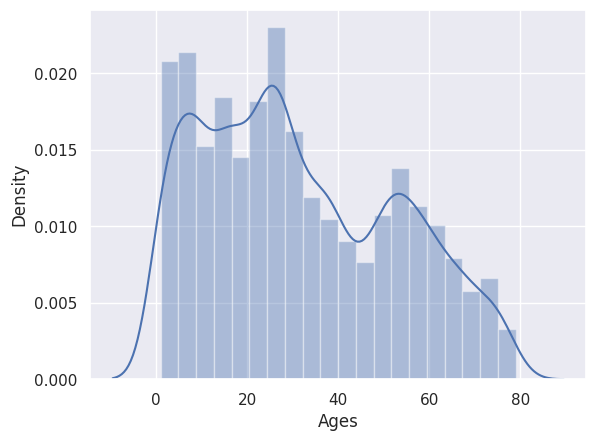

In [ ]:
sns.distplot(df['Ages'],kde=True, bins=20)

In [ ]:
df['Genders'].value_counts()

,count
Genders,
1,4361
0,3509
3,1


/tmp/ipython-input-500671857.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genders', data=df, palette='Set2')


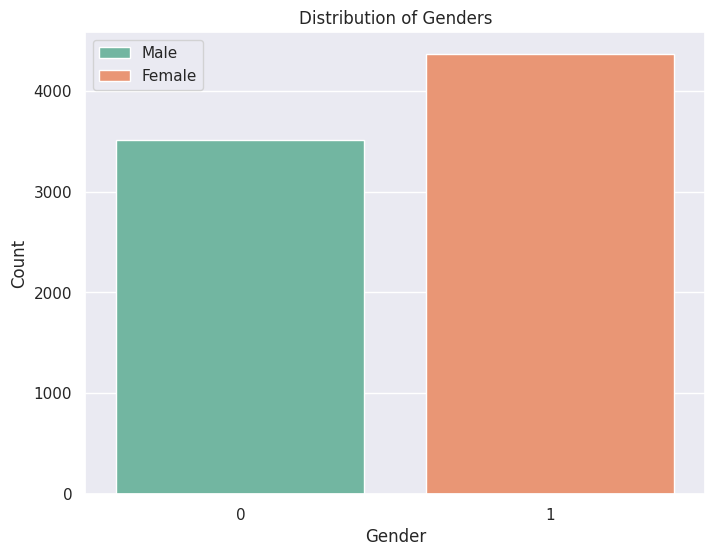

In [ ]:
df = df[df['Genders'] != 3]

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

plt.figure(figsize=(8, 6))
sns.countplot(x='Genders', data=df, palette='Set2')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Genders')
plt.legend(labels=['Male', 'Female'])
plt.show()

In [ ]:
x = []
y = []

for i in range(len(df)):
    df['Images'].iloc[i] = df['Images'].iloc[i].resize((200,200), Image.LANCZOS)
    ar = np.asarray(df['Images'].iloc[i])
    x.append(ar)
    agegen = [int(df['Ages'].iloc[i]), int(df['Genders'].iloc[i])]
    y.append(agegen)
x = np.array(x)

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Images'].iloc[i] = df['Images'].iloc[i].resize((200,200), Image.LANCZOS)
/tmp/ipython-input-463654239.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Images'].iloc[i] = df['Images'].iloc[i].resize((200,200), Image.LANCZOS)
/tmp/ipython-input-463654239.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on

In [ ]:
y_age = df['Ages']
y_gender = df['Genders']

x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(x, y_age, test_size=0.2, stratify=y_age)
x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(x, y_gender, test_size=0.2, stratify=y_gender)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization, Input
from tensorflow.keras import optimizers

agemodel = Sequential()

agemodel.add(Input(shape=(200, 200, 3)))
agemodel.add(Conv2D(32, (3, 3), activation='relu'))
agemodel.add(MaxPooling2D((2, 2)))
agemodel.add(BatchNormalization())
agemodel.add(Dropout(0.2))

agemodel.add(Conv2D(64, (3, 3), activation='relu'))
agemodel.add(MaxPooling2D((2, 2)))
agemodel.add(BatchNormalization())
agemodel.add(Dropout(0.2))

agemodel.add(Conv2D(128, (3, 3), activation='relu'))
agemodel.add(MaxPooling2D((2, 2)))
agemodel.add(BatchNormalization())
agemodel.add(Dropout(0.3))

agemodel.add(Conv2D(256, (3, 3), activation='relu'))
agemodel.add(MaxPooling2D((2, 2)))
agemodel.add(BatchNormalization())
agemodel.add(Dropout(0.3))

agemodel.add(Flatten())

agemodel.add(Dense(128, activation='relu'))
agemodel.add(Dropout(0.5))

agemodel.add(Dense(64, activation='relu'))
agemodel.add(Dropout(0.5))

agemodel.add(Dense(1, activation='relu'))

agemodel.compile(loss='mean_squared_error',
                 optimizer=optimizers.Adam(learning_rate=0.0001),
                 metrics=['mae'])

In [ ]:
agemodel.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 99, 99, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 23, 23, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 10, 10, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,276,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,675,585 (14.02 MB)

 Trainable params: 3,674,625 (14.02 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
datagen = ImageDataGenerator(
      rescale=1./255., width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train1 = datagen.flow(x_train_age, y_train_age, batch_size=64)

test1 = test_datagen.flow(
        x_test_age, y_test_age,
        batch_size=64)

history1 = agemodel.fit(
    train1,
    epochs=10,
    validation_data=test1,
    shuffle=True
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 972s 10s/step - loss: 944.3580 - mae: 24.0188 - val_loss: 488.9698 - val_mae: 17.7444
Epoch 2/10
42/99 ━━━━━━━━━━━━━━━━━━━━ 8:27 9s/step - loss: 522.1895 - mae: 17.8031

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

# Manji model, prvi je previse kompleksan i treba previse vremena da se zavrsi
agemodel = Sequential()
agemodel.add(Input(shape=(200, 200, 3)))

agemodel.add(Conv2D(32, (3, 3), activation='relu'))
agemodel.add(MaxPooling2D((2, 2)))

agemodel.add(Conv2D(64, (3, 3), activation='relu'))
agemodel.add(MaxPooling2D((2, 2)))

agemodel.add(Flatten())
agemodel.add(Dense(64, activation='relu'))
agemodel.add(Dropout(0.3))
agemodel.add(Dense(1, activation='relu'))

agemodel.compile(
    loss='mean_squared_error',
    optimizer=optimizers.Adam(learning_rate=0.0001),
    metrics=['mae']
)

datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train1 = datagen.flow(x_train_age, y_train_age, batch_size=32)
test1 = test_datagen.flow(x_test_age, y_test_age, batch_size=32)

history = agemodel.fit(
    train1,
    epochs=10,
    validation_data=test1,
    shuffle=True
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 477s 2s/step - loss: 596.0577 - mae: 19.7850 - val_loss: 371.4380 - val_mae: 15.6364
Epoch 2/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 490s 2s/step - loss: 355.5927 - mae: 15.3629 - val_loss: 278.5881 - val_mae: 12.5922
Epoch 3/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 480s 2s/step - loss: 284.6615 - mae: 13.2270 - val_loss: 214.2864 - val_mae: 11.5796
Epoch 4/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 480s 2s/step - loss: 247.5551 - mae: 12.3656 - val_loss: 207.4498 - val_mae: 10.8352
Epoch 5/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 480s 2s/step - loss: 215.2690 - mae: 11.3883 - val_loss: 187.8242 - val_mae: 10.5467
Epoch 6/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 477s 2s/step - loss: 207.9900 - mae: 11.2443 - val_loss: 209.7366 - val_mae: 10.6570
Epoch 7/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 481s 2s/step - loss: 202.9562 - mae: 10.8919 - val_loss: 171.1936 - val_mae: 10.1654
Epoch 8/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 480s 2s/step - loss: 202.9672 - mae: 10.8983 - val_loss: 174.5894 - val_mae: 10.4547


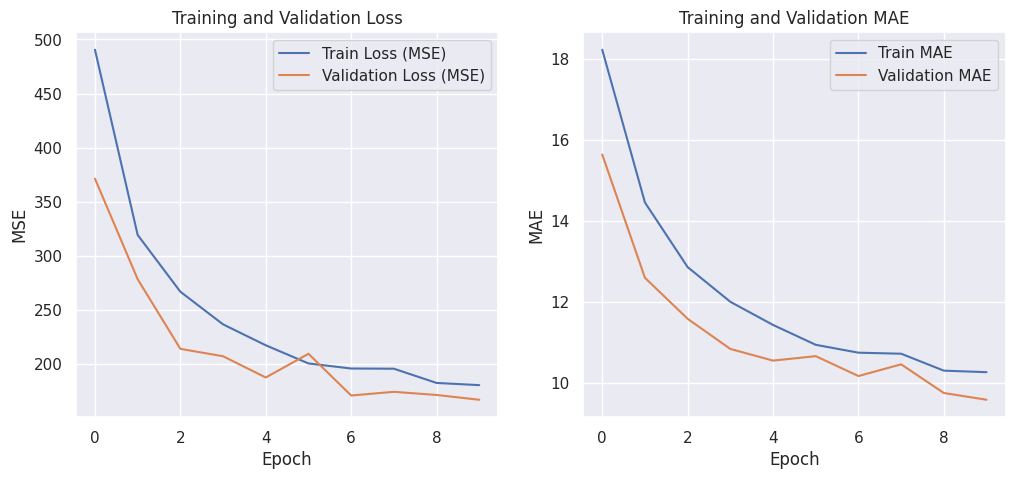

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Validation Loss')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Training and Validation MAE')
plt.legend()

plt.show()

In [ ]:
agemodel.save('drive/MyDrive/model_age.h5')

In [ ]:
import tensorflow.keras.backend as K
K.clear_session()

In [ ]:
genmodel = Sequential()

genmodel.add(Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(BatchNormalization())
genmodel.add(Dropout(0.2))

genmodel.add(Conv2D(64, (3,3), activation='relu'))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(BatchNormalization())
genmodel.add(Dropout(0.2))

genmodel.add(Conv2D(128, (3,3), activation='relu'))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(BatchNormalization())
genmodel.add(Dropout(0.2))

genmodel.add(Flatten())

genmodel.add(Dense(64, activation='relu'))
genmodel.add(Dropout(0.5))

genmodel.add(Dense(1, activation='sigmoid'))

genmodel.compile(loss='binary_crossentropy',
             optimizer=optimizers.Adam(learning_rate=0.0001),
             metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
genmodel.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 99, 99, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 23, 23, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 67712)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │     4,333,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,427,841 (16.89 MB)

 Trainable params: 4,427,393 (16.89 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

datagen = ImageDataGenerator(
      rescale=1./255., width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train2 = datagen.flow(x_train_gender, y_train_gender, batch_size=32)

test2 = test_datagen.flow(
        x_test_gender, y_test_gender,
        batch_size=32)

history2 = genmodel.fit(
    train2,
    epochs=10,
    shuffle=True,
    validation_data=test2,
    callbacks=[early_stopping]
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 819s 4s/step - accuracy: 0.6224 - loss: 0.9161 - val_accuracy: 0.6118 - val_loss: 0.6393
Epoch 2/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 808s 4s/step - accuracy: 0.7172 - loss: 0.5923 - val_accuracy: 0.5972 - val_loss: 0.8636
Epoch 3/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 803s 4s/step - accuracy: 0.7429 - loss: 0.5598 - val_accuracy: 0.7827 - val_loss: 0.4657
Epoch 4/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 863s 4s/step - accuracy: 0.7570 - loss: 0.5353 - val_accuracy: 0.8170 - val_loss: 0.4043
Epoch 5/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 801s 4s/step - accuracy: 0.7744 - loss: 0.4939 - val_accuracy: 0.8151 - val_loss: 0.4073
Epoch 6/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 795s 4s/step - accuracy: 0.7648 - loss: 0.4933 - val_accuracy: 0.8024 - val_loss: 0.4102


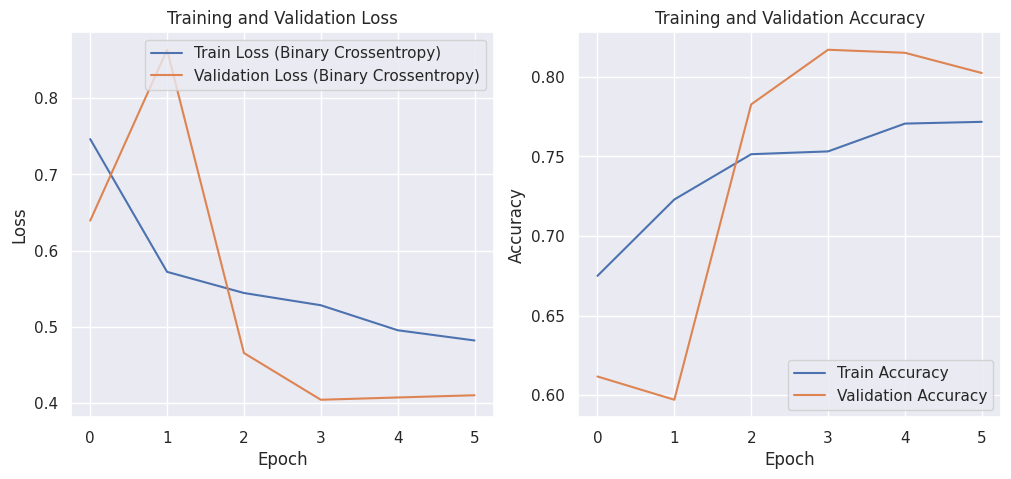

In [ ]:
plt.figure(figsize=(12,5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Train Loss (Binary Crossentropy)')
plt.plot(history2.history['val_loss'], label='Validation Loss (Binary Crossentropy)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [ ]:
genmodel.save('drive/MyDrive/model_gen.h5')

In [ ]:
from tensorflow.keras.models import load_model

agemodel = load_model('/content/drive/MyDrive/model_age.h5')

In [29]:
def process_and_predict(file):
    im = Image.open(file)
    width, height = im.size
    if width == height:
        im = im.resize((200, 200), Image.LANCZOS)
    else:
        if width > height:
            left = width/2 - height/2
            right = width/2 + height/2
            top = 0
            bottom = height
            im = im.crop((left, top, right, bottom))
            im = im.resize((200, 200), Image.LANCZOS)
        else:
            left = 0
            right = width
            top = 0
            bottom = width
            im = im.crop((left, top, right, bottom))
            im = im.resize((200, 200), Image.LANCZOS)

    ar = np.asarray(im).astype('float32') / 255.0
    ar = ar.reshape(-1, 200, 200, 3)

    age_pred = agemodel.predict(ar)
    gender_pred = np.round(genmodel.predict(ar))

    age = int(age_pred[0][0])
    gender_val = gender_pred[0][0]

    if gender_val == 0:
        gender = 'male'
    else:
        gender = 'female'

    print('Age:', age, '\nGender:', gender)
    return im.resize((300, 300), Image.LANCZOS)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
Age: 19 
Gender: female


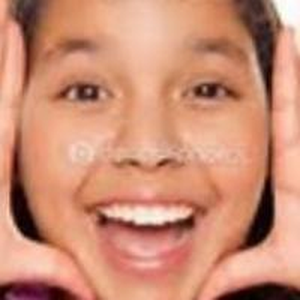

In [30]:
process_and_predict(folder_path+'9_1_4_20170103213057382.jpg.chip.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Age: 51 
Gender: male


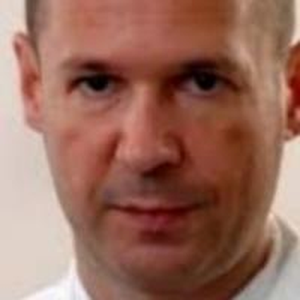

In [31]:
process_and_predict(folder_path+'42_0_0_20170104210426844.jpg.chip.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Age: 16 
Gender: female


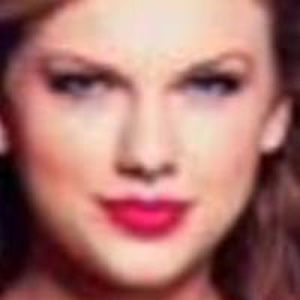

In [33]:
process_and_predict(folder_path+'25_1_0_20170104021710995.jpg.chip.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Age: 28 
Gender: male


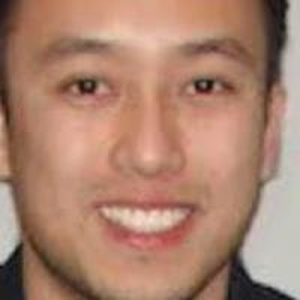

In [34]:
process_and_predict(folder_path+'25_0_2_20170104192902767.jpg.chip.jpg')